# Fitting data to univariate distributions with `distfit`

## What's our goal?

You have some data points. Numeric, preferably.

And you want to find out which statistical distribution they might have come from. Classic statistical inference problem.

There are, of course, rigorous statistical methods to accomplish this goal. But, maybe you are a busy data scientist. Or, a busier software engineer who happens to be given this dataset to quickly write an application endpoint so that another machine learning app can use some synthetic data generated based on the best distribution that matches the data.

In short, you don't have a lot of time on hand and want to find a quick method to discover the best-matching distribution that the data could have come from.

Basically, you want to run an automated batch of **[goodness-of-fit (GOF) tests](https://en.wikipedia.org/wiki/Goodness_of_fit)** on a number of distributions and summarize the result in a flash.

You can, of course, write code from scratch to run the data through standard GOF tests using say `Scipy` library one by one for a number of distributions.

Or, you can use this [small but useful Python library](https://erdogant.github.io/distfit/pages/html/index.html) - `distfit` to do the heavy lifting for you.

In [1]:
from distfit import distfit
import numpy as np
import matplotlib.pyplot as plt

### Generate test data

In [2]:
# Generate test data
data1 = np.random.normal(loc=5.0, scale=10, size=1000)

### Initiate model

In [3]:
# Initialize model
dist1 = distfit(bins=25,alpha=0.02,stats='ks')

### Fit to the data

In [4]:
dist1.fit_transform(data1,verbose=1)

{'model': {'distr': <scipy.stats._continuous_distns.norm_gen at 0x2493c0c5370>,
  'stats': 'ks',
  'params': (5.168141032320424, 10.297680831713478),
  'name': 'norm',
  'model': <scipy.stats._distn_infrastructure.rv_frozen at 0x2493d248ca0>,
  'score': 1.1527914473738086e-07,
  'loc': 5.168141032320424,
  'scale': 10.297680831713478,
  'arg': (),
  'CII_min_alpha': -15.980709757845336,
  'CII_max_alpha': 26.31699182248618},
 'summary':          distr     score  LLE               loc            scale  \
 0         norm       0.0  NaN          5.168141        10.297681   
 1            t       0.0  NaN          5.168624        10.297493   
 2   genextreme       0.0  NaN          1.345935        10.208551   
 3        gamma       0.0  NaN       -804.696532         0.130926   
 4      lognorm       0.0  NaN       -442.600479        447.61915   
 5         beta       0.0  NaN        -56.534935       129.443957   
 6     loggamma       0.0  NaN      -2197.020027       320.587092   
 7     d

### Plot

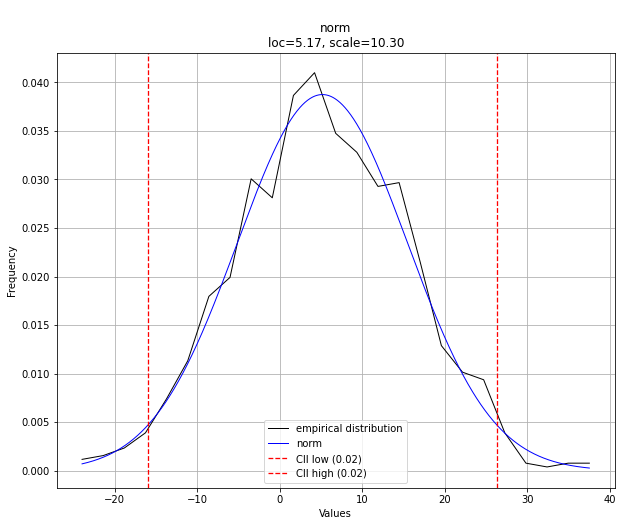

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'\nnorm\nloc=5.17, scale=10.30'}, xlabel='Values', ylabel='Frequency'>)

In [5]:
dist1.plot(verbose=1)

### Summary table of fitted distributions

In [6]:
dist1.summary

,distr,score,LLE,loc,scale,arg
0,norm,0.0,NaN,5.168141,10.297681,()
1,t,0.0,NaN,5.168624,10.297493,"(5964061.469961431,)"
2,genextreme,0.0,NaN,1.345935,10.208551,"(0.24650762422035927,)"
3,gamma,0.0,NaN,-804.696532,0.130926,"(6185.654208686727,)"
4,lognorm,0.0,NaN,-442.600479,447.61915,"(0.02303400880174134,)"
5,beta,0.0,NaN,-56.534935,129.443957,"(18.311101389857235, 20.103025094062506)"
6,loggamma,0.0,NaN,-2197.020027,320.587092,"(962.7002556656262,)"
7,dweibull,0.001945,NaN,5.968244,8.919706,"(1.2805598141142776,)"
8,expon,1.108472,NaN,-25.240552,30.408693,()
9,pareto,1.108472,NaN,-710722358.209082,710722332.96853,"(21661180.97529108,)"


### Using `Scipy` functions internally

In [7]:
dist1.distributions

### Generate synthetic data too

In [8]:
dist1.generate(10,verbose=1)

array([15.67374831, 13.91320123,  2.56643945, 22.87063749, -1.26082996,
        8.06140318, 12.93001425,  4.26721857, -3.99528754, 10.23653794])

### Could be tricky if the shapes are close - especially with small dataset

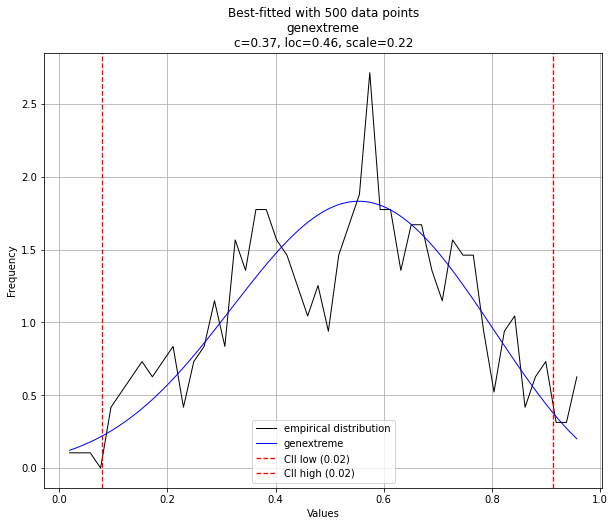

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best-fitted with 500 data points\ngenextreme\nc=0.37, loc=0.46, scale=0.22'}, xlabel='Values', ylabel='Frequency'>)

In [9]:
data2 = np.random.beta(a=2.2,b=2.0,size=500)
dist2 = distfit(bins=50,alpha=0.02,stats='ks')
dist2.fit_transform(data2,verbose=1)
dist2.plot(title="Best-fitted with 500 data points",verbose=1)

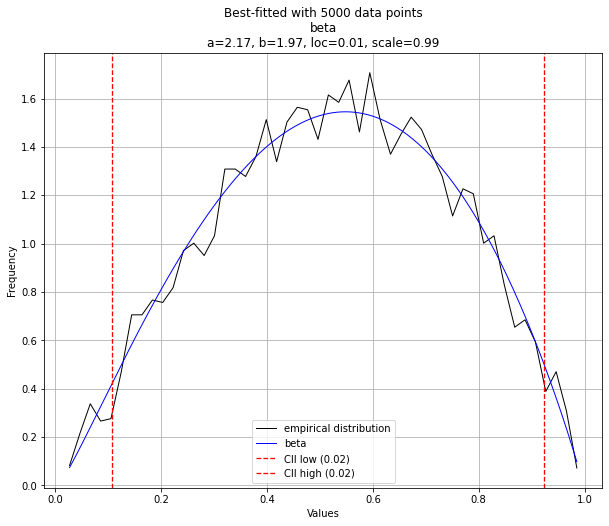

(<Figure size 720x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Best-fitted with 5000 data points\nbeta\na=2.17, b=1.97, loc=0.01, scale=0.99'}, xlabel='Values', ylabel='Frequency'>)

In [10]:
data2 = np.random.beta(a=2.2,b=2.0,size=5000)
dist2 = distfit(bins=50,alpha=0.02,stats='ks')
dist2.fit_transform(data2,verbose=1)
dist2.plot(title="Best-fitted with 5000 data points",verbose=1)

### Predict

In [11]:
dist2.predict(0.2)

[distfit] >predict..
[distfit] >Multiple test correction..[fdr_bh]


{'y': array([0.2]),
 'y_proba': array([0.07816971]),
 'y_pred': array(['none'], dtype='<U4'),
 'P': array([0.07816971])}